In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


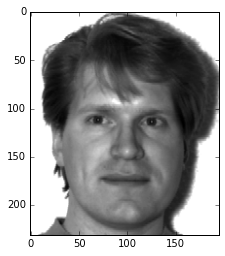

In [2]:
# read and view original image
img = mpimg.imread("/Users/tnybny/Documents/PCA-on-images/faces-corrected/subject01.centerlight.pgm", format = 'pgm')
plt.imshow(img, cmap = 'gray')

In [3]:
# create linear right shift kernel
w, h = 3, 3
kernel = np.array([[0 for x in range(w)] for y in range(h)])
kernel[1, 2] = 1
print kernel

[[0 0 0]
 [0 0 1]
 [0 0 0]]


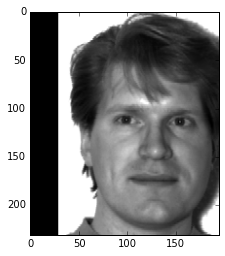

In [4]:
# convolve image with kernel to get shifted image
ker_img = signal.convolve2d(img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
ker_img = signal.convolve2d(ker_img, kernel, mode = 'same')
plt.imshow(ker_img, cmap = 'gray')

In [5]:
# try smoothing and sharpening filters
# create kernels
w, h = 3, 3
kernel_1 = np.array([[0 for x in range(w)] for y in range(h)])
kernel_1[1, 1] = 4
print kernel_1
w, h = 3, 3
kernel_2 = np.array([[1 for x in range(w)] for y in range(h)])
print kernel_2

[[0 0 0]
 [0 4 0]
 [0 0 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


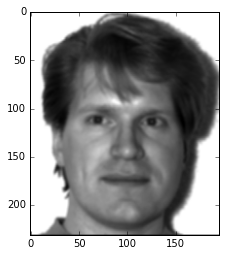

In [6]:
# convolve image with kernel_2 to get smooth image (local average)
ker_img = signal.convolve2d(img, kernel_2, mode = 'same') / 9.0
plt.imshow(ker_img, cmap = 'gray')

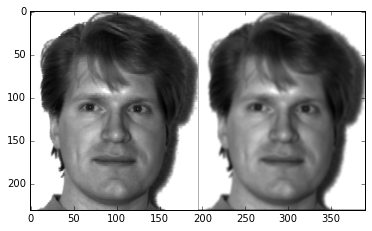

In [7]:
# To get sharpening effect (accentuate differences with local average)
ker_img2 = signal.convolve2d(img, kernel_1, mode = 'same')
ker_img2 = ker_img2 - ker_img
ker_img2 = 255. * (ker_img2 - np.amin(ker_img2)) / (np.amax(ker_img2) - np.amin(ker_img2))
plot_image = np.concatenate((img, ker_img), axis=1)
plt.imshow(plot_image, cmap = 'gray')
# doesn't seem very good.... seems similar to the smooth image actually... weird.

In [8]:
# try laplacian filter
w, h = 3, 3
kernel = np.array([[-1 for x in range(w)] for y in range(h)])
kernel[1, 1] = 8
print kernel

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


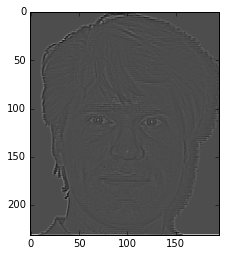

In [9]:
# convolve image with laplacian kernel to get laplacian image
ker_img = signal.convolve2d(img, kernel, mode = 'same')
plt.imshow(ker_img, cmap = 'gray')

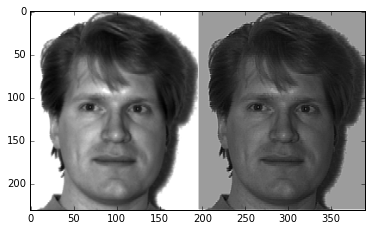

In [10]:
# sharpen image by adding scaled laplacian back to original
ker_img = 255. * (ker_img - np.amin(ker_img)) / (np.amax(ker_img) - np.amin(ker_img))
sharp = img + ker_img
sharp = 255. * (sharp - np.amin(sharp)) / (np.amax(sharp) - np.amin(sharp))
plot_image = np.concatenate((img, sharp), axis=1)
plt.imshow(plot_image, cmap = 'gray')
# seems like a better sharpening job than accentuating differences with local avg earlier...?
# but why is it darker than original image? Hard to see detail... Maybe some stretching of values is needed.

In [11]:
# try sobel filter for vertical edge detection
# create kernels
w, h = 3, 3
kernel = np.transpose(np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]))
print kernel

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


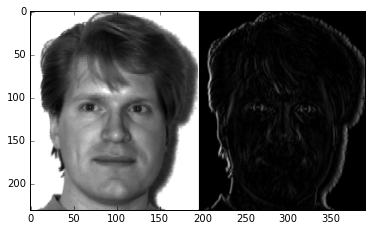

In [12]:
# convolve image with kernel to get edge detected image
ker_img = signal.convolve2d(img, kernel, mode = 'same')
ker_img = np.abs(ker_img) # important to take absolute value
ker_img = 255. * (ker_img - np.amin(ker_img)) / (np.amax(ker_img) - np.amin(ker_img))
plot_image = np.concatenate((img, ker_img), axis=1)
plt.imshow(plot_image, cmap = 'gray')